In [1]:
from pathlib import Path
import sys
sys.path.insert(0, str(Path().absolute().parent))

import matplotlib.pyplot as plt
import numpy as np

from data.data_functions import DataLoader, RiverTransform, PhaseTransform, DerivTransform
from data.plot_functions import plot_river

Define the experiment number to load, e.g. 199

In [2]:
exp_num = 199

Load the raw data for the image and the phase data to calculate the peak shift

In [3]:
dataloader = DataLoader({"199": [exp_num]}, transforms=[RiverTransform])
raw_data, _ = dataloader.load()
img_data = raw_data[exp_num]

wavelengths = dataloader._metadata["wavelengths"][exp_num]

Loading experimental data
(1/1) 199 (1 exp.): [===================0] 100% complete
Length of experimental set loaded: 1


In [4]:
psi_data, _ = DataLoader({"199": [exp_num]}, transforms=[PhaseTransform]).load()
psi = psi_data[exp_num]
peak_loc = (psi-np.min(psi))/(np.max(psi)-np.min(psi)) \
    * (
    wavelengths[np.argmax(img_data[-1,:])]-wavelengths[np.argmax(img_data[0,:])]
    ) + wavelengths[np.argmax(img_data[0,:])]

Loading experimental data
(1/1) 199 (1 exp.): [===================0] 100% complete
Length of experimental set loaded: 1


##### River plot

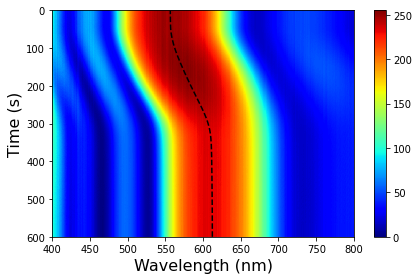

In [5]:
fig, ax = plt.subplots()
im = plot_river(img_data, wavelengths, ax=ax)

plt.plot(peak_loc[::-1], np.linspace(0,599,len(psi)),'k--')
cbar = plt.colorbar(im)

plt.xlim([400, 800])
plt.gca().set_aspect(4/8.)

## Extracting psi derivative

In [6]:
import pandas as pd

Loading experimental data
(1/1) 199 (1 exp.): [===================0] 100% complete
Length of experimental set loaded: 1
Loading experimental data
(1/1) 199 (1 exp.): [===================0] 100% complete
Length of experimental set loaded: 1


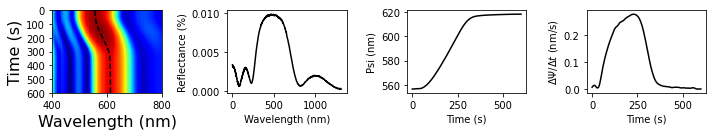

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,2))

# River plot
ax = axes[0]
im = plot_river(img_data, wavelengths, ax=ax)

ax.plot(peak_loc[::-1], np.linspace(0,599,len(psi)),'k--')
#cbar = plt.colorbar(im)

ax.set_xlim([400, 800])
ax.set_aspect(4/8.)

# Spectrum
ax = axes[1]
ax.plot(img_data[100,:]/np.max(img_data[:]*100), 'k-')

ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Reflectance (%)")

# Psi
ax = axes[2]
#psi_ = PhaseTransform.transform(pd.DataFrame(img_data.transpose()))
psi_ = DataLoader({"199": [exp_num]}, transforms=[PhaseTransform]).load()[0][exp_num]

ax.plot(psi_, 'k-')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Psi (nm)")

# Psi deriv
ax = axes[3]
#psi_deriv = DerivTransform.transform(pd.DataFrame(img_data.transpose()))
psi_deriv = DataLoader({"199": [exp_num]}, transforms=[DerivTransform]).load()[0][exp_num]

ax.plot(psi_deriv, 'k-')
ax.set_xlabel("Time (s)")
ax.set_ylabel("$\Delta \Psi/\Delta t$ (nm/s)")

plt.tight_layout()
# fig.savefig('./Fig2 - River plot (SI).svg', dpi=1200)